In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# All Libraries are imported.

In [ ]:

# Loading the dataset and its provessing.
path="/content/innovize_final_ml.csv"
df=pd.read_csv(path)

df=df.dropna(subset=["is_healthy"])
print(df.head(10))

X=df.drop(columns=["is_healthy"])
y=df["is_healthy"]

num_col=X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_col=X.select_dtypes(include=["object"]).columns.tolist()

   phy_fitness    diet_pref       act_level  sleep_hrs  mindfulness  \
0          3.0        Vegan       Sedentary          7           10   
1          4.0        Vegan  Lightly Active          7            1   
2          8.0   Vegetarian          Active          8           10   
3          2.0  Pescatarian       Sedentary          8            7   
4          9.0  Pescatarian   Highly Active          5            7   
5          2.0         Keto       Sedentary          8            9   
6          1.0  Pescatarian       Sedentary          6           10   
7          2.0         Keto       Sedentary          7            5   
8          5.0  Pescatarian  Lightly Active          9            6   
9          9.0  Pescatarian   Highly Active          8            2   

       career  gender  daily_avg_steps  daily_avg_calories  is_healthy  
0      Artist     1.0           2020.0              1831.0           0  
1     Teacher     0.0           5154.0              2190.0           0  

In [ ]:
# Data procesing for missing values.
num_imputer=SimpleImputer(strategy="median")
cat_imputer=SimpleImputer(strategy="most_frequent")
label_encoders={col: LabelEncoder() for col in cat_col}

# Splitting the dataset into training (80%) and testing (20%) sets.
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

X_train[num_col]=num_imputer.fit_transform(X_train[num_col])
X_test[num_col]=num_imputer.transform(X_test[num_col])

for col in cat_col:
    X_train[col]=cat_imputer.fit_transform(X_train[[col]]).ravel()
    X_test[col]=cat_imputer.transform(X_test[[col]]).ravel()
    X_train[col]=label_encoders[col].fit_transform(X_train[col])
    X_test[col]=label_encoders[col].transform(X_test[col])

In [ ]:
# We will use RFC and train it here.
clf=RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Accuracy
accuracy=clf.score(X_test, y_test)
print(f"Random Forest Model Accuracy: {accuracy:.2%}")

Random Forest Model Accuracy: 97.58%


In [ ]:
feature_1="phy_fitness"
feature_2="mindfulness"


X_train_2D=X_train[[feature_1, feature_2]]
X_test_2D=X_test[[feature_1, feature_2]]

clf_2D=RandomForestClassifier(n_estimators=100, random_state=42)
clf_2D.fit(X_train_2D, y_train)

x_min, x_max=X_train_2D[feature_1].min()-1, X_train_2D[feature_1].max()+1
y_min, y_max=X_train_2D[feature_2].min()-1, X_train_2D[feature_2].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


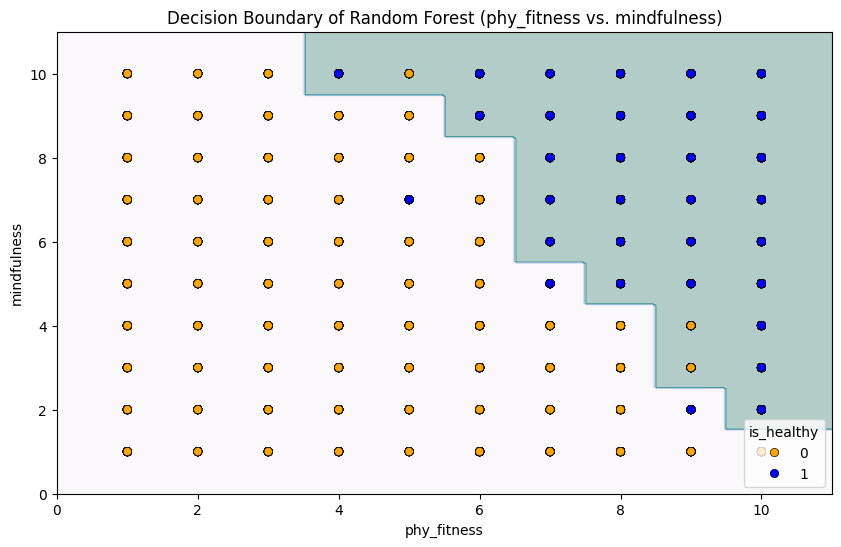

In [ ]:
# Meshgrid points
Z=clf_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z=Z.reshape(xx.shape)

cmap_custom="PuBuGn"
palette_custom = {"0": "orange", "1": "blue"}

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_custom)

# Scatter plot here
sns.scatterplot(x=X_train_2D[feature_1], y=X_train_2D[feature_2],
                hue=y_train.astype(str), palette=palette_custom, edgecolor="k")
# The plot here
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title("Decision Boundary of Random Forest (phy_fitness vs. mindfulness)")

plt.show()